# Classification

기냐 아니냐 판단할때 여러가지 근거를 가지고 판단한다. 설치할지/안할지, 들어올지/안들어올지, 스팸인지/아닌지, 사기인지/아닌지, 양성인지/음성인지.. 이런 `y={0,1}` 분류 문제(Binary classification)를 풀려면 어떻게 해야할까?

```
0은 negative class,
1은 positive class
```

직선(linear)을 사용하지 않고, [S 커브(logistic)](https://en.wikipedia.org/wiki/Logistic_function)을 사용하는 것이다. 이 S커브는 정의역 $x \in ({-\infty, \infty}) $에서 정의되고 항상 0에서 1사이 값을 갖는다.

## Logistic function (Sigmoid function)

$$ h(x) = \frac{1}{(1+{e^{-{x}}})} $$

이 (0, 0.5) 점대칭인 S 커브가 Logistic function이고, 이 함수를 모델로 Logistic regression을 할 것이다. 아래는 실제로 한 번 그려보는 코드.

=> (m,n) 점대칭

$ \frac{f(2m-x)+f(x)}{2} = n $


In [18]:
# Package path
import sys; sys.path.append('/usr/local/lib/python2.7/site-packages')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def sigmoid(t):
    return 1.0 / (1.0+np.exp(-t))

In [40]:
# -6부터 6까지 500개 등분 (linearly spaced)
t = np.linspace(-6, 6, 500)

In [41]:
# [sigmoid(ele) for ele in t]

In [42]:
# logistic 함수를 그리기 위해 해당 정의역에서 y 값을 그림
y = np.array([sigmoid(ele) for ele in t])

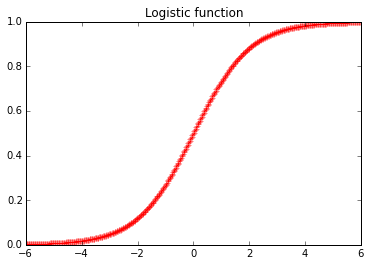

In [44]:
plt.plot(t,y, 'r+')
plt.title('Logistic function')

## Logistic regression

그래서 저 S 커브로 어떻게 분류 작업을 하느냐인데, Logistic regression의 기본적인 개념은 이 Logistic Function의 y값을 y가 1이 될 확률로 보는 것이다. 

$$ h_{\theta}(x) = \frac{1}{(1+{e^{-{\theta}^T{x}}})} = P\left(y=1\middle | x; \theta\right)$$

그래서 $P\left(y=1\middle | x; \theta\right)$이 확률이 0.5가 이상이면 1로 분류하고, 0.5 미만이면 0으로 분류하는 것이다. 그런데 그래프에서 y값(확률)이 0.5보다 커지는 기준을 보면 ${\theta}^T{x} > 0$ 일때 이다. 이때 확률이 0.5가 되는 지점 즉 ${\theta}^T{x}=0$이 되는 점들을 **Descision boundary**라고 한다.

목표는 모델을 이렇게 두고, 최적의 $\theta$ 값을 찾는 것이다. default $\theta$값을 두고, Gradient Descent를 통해 Cost function이 가장 작은 $\theta$값을 찾아가는 것이다.

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{Cost(h_{\theta}(x^{(i)}), y^{(i)})} $$

$$ \min_{\theta}{J(\theta)} $$

고등학교 미적분 수업을 정상적으로 이수했다면, "최소/최대값? => 미분이지!"가 떠오를 것이다. 여기서도 Cost function의 최소값을 구하기 위해 "편미분"을 한다. Logistic regression의 Cost function은 아래와 같이 정의한다. Logistic regression에서 Cost function을 Linear regression의 Cost function처럼 사용하면 Convex가 아니여서 안된다.

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}{ [y^{(i)}\log{h_{\theta}(x^{(i)})} + (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}] } $$

이 녀석을 $\theta_j$로 미분하면.. [아주 놀랍게도](http://feature-space.com/2011/10/28/logistic-cost-function-derivative/) 아래와 같이 로그가 사라진 깔끔한 형태가 나온다.

$$ \frac{d}{d\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^{m}{[h_{\theta}(x^{(i)})-y^{(i)}]x_j}$$

theta의 초기값이 주워지고 나서, minimum값을 찾기 위해 현 위치보다 조금 더 아래로 갈 수 있는 곳으로 발자국을 떼는데 그것을 수식으로 표현하면 아래와 같다.

$$ \theta_j := \theta_j - {\alpha} \frac{d}{d\theta_j}J(\theta) $$

$$ \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^{m}{[h_{\theta}(x^{(i)})-y^{(i)}]x_j} $$

이제 for문 안에서 열심히 **편미분값으로 방향을 잡아 가면서 가장 작은 Cost function을 찾아가면** 된다. 

## Logistic Regression in Pure Python

In [45]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
df = pd.read_csv("../CourseraCourse/HunjaeJung/machine-learning-ex2/ex2/ex2data1.txt", names=['ex1', 'ex2', 'admitted'])

In [47]:
df.head()

,ex1,ex2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


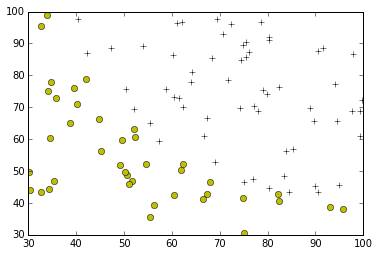

In [48]:
x = np.arange(0, 5, 0.1);
y = np.sin(x)

pos = df[df['admitted']==1]
neg = df[df['admitted']==0]

plt.plot(pos['ex1'], pos['ex2'], 'k+')
plt.plot(neg['ex1'], neg['ex2'], 'yo')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
ex1         100 non-null float64
ex2         100 non-null float64
admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [50]:
df.shape

(100, 3)

In [53]:
# Theta 초기화값만 있다면 데이터를 가지고 당장 J(theta)과 J'(theta)를구할 수 있어요
initial_theta = np.zeros([df.shape[1], 1])

In [54]:
initial_theta

array([[ 0.],
       [ 0.],
       [ 0.]])

In [55]:
X = df[df.columns[:-1]]

In [58]:
dummy_x = np.ones(df.shape[0])

In [59]:
X_df = pd.concat([pd.DataFrame(dummy_x), X], axis=1)

In [61]:
X = X_df.as_matrix()

In [63]:
y_df = df['admitted']

In [64]:
y = y_df.as_matrix()

In [65]:
sample_X = X

In [66]:
sample_y = y

In [67]:
y = y.reshape(100,1)

In [68]:
def cost_function(theta, X, y, l):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    
    cost = -(1.0/m)* np.sum(np.multiply(y, np.log(h)) + np.multiply(1-y, np.log(1-h)))
    
    grad = (1.0/m)*X.transpose().dot(h-y)
    
    return cost, grad

In [69]:
cost, grad = cost_function(initial_theta, X, y, 1)

In [71]:
cost

0.69314718055994529

In [72]:
grad

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [73]:
theta = initial_theta
a = 0.0008
prev_cost = 0

In [77]:
for i in range(4000):
    cost, grad = cost_function(theta, X, y, 1)
    theta = theta - a*(grad)
#     print cost

In [79]:
# 아.. 존나 안됨..
# theta = fmin_bfgs(cost_function_wrapper, x0=initial_theta, fprime=cost_grad_function_wrapper, args=(X, y, 1), maxiter = 40)

## Logistic Regression in tensorflow

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
x_data = np.float32(np.random.rand(2,100))

In [14]:
x_data.shape

(2, 100)

In [19]:
y_data = np.dot([0.100, 0.200], x_data) + 0.3

In [28]:
c = tf.Variable(tf.zeros([1]))

In [29]:
W = tf.Variable(tf.random_uniform([1,2], -1.0, 1.0))

In [30]:
y = tf.matmul(W, x_data) + c

In [31]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [40]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

In [41]:
train = optimizer.minimize(loss)

In [42]:
loss_list = []

In [43]:
init_op = tf.global_variables_initializer()

In [44]:
sess = tf.Session()

In [45]:
sess.run(init_op)

In [46]:
for i in xrange(0,2000):
    sess.run(train)
    loss_list.append(sess.run(loss))

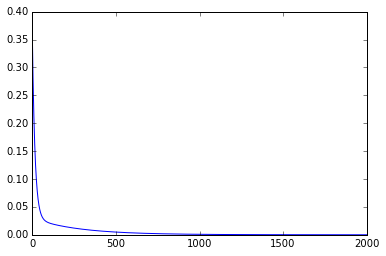

In [47]:
plt.plot(loss_list)

In [4]:
xy = np.loadtxt('04train.txt', unpack=True, dtype='float32')
x_data = xy[0:-1]
y_data = xy[-1]

In [2]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# len(x_data)개의 theta를 -1부터 1까지 random 설정
W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0)) 

In [636]:
h = tf.matmul(W, X)
hypothesis = tf.div(1., 1. + tf.exp(-h))

In [637]:
# reduce mean 평균구하기
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

In [638]:
a = tf.Variable(0.1)  # learning rate, alpha
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)  # goal is minimize cost

In [639]:
# 초기화 사용해야함.
init = tf.global_variables_initializer()

In [646]:
sess = tf.Session()
sess.run(init)
for step in xrange(3001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if step % 20 == 0:
        print step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W)

0 0.65208 [[-0.65913403  0.81738943 -0.60867792]]
20 0.604939 [[-0.79773539  0.61710471 -0.42658219]]
40 0.583135 [[-0.92746985  0.50917882 -0.30476254]]
60 0.570978 [[-1.0524404   0.45424983 -0.2300947 ]]
80 0.562288 [[-1.17288446  0.42972893 -0.18269151]]
100 0.555008 [[-1.28884053  0.42151192 -0.15029444]]
120 0.548497 [[-1.40039003  0.42169628 -0.12606879]]
140 0.542542 [[-1.50767744  0.42606744 -0.10636337]]
160 0.537054 [[-1.6108855   0.4324277  -0.08925658]]
180 0.531979 [[-1.7102145   0.43964374 -0.07373641]]
200 0.527275 [[-1.80586731  0.44713554 -0.05926405]]
220 0.522909 [[-1.8980428   0.45460939 -0.045546  ]]
240 0.518848 [[-1.98693144  0.46191987 -0.03241688]]
260 0.515067 [[-2.0727129   0.46899813 -0.01977887]]
280 0.511541 [[-2.15555811  0.47581547 -0.00757011]]
300 0.508246 [[-2.23562574  0.48236355  0.00425149]]
320 0.505165 [[-2.31306481  0.48864466  0.0157169 ]]
340 0.502278 [[-2.38801479  0.4946664   0.02685037]]
360 0.49957 [[-2.46060634  0.50043893  0.03767229]]
3

In [643]:
print '-----------------------------------------'
print sess.run(hypothesis, feed_dict={X: [[1], [2], [2]]}) > 0.5
print sess.run(hypothesis, feed_dict={X: [[1], [5], [5]]}) > 0.5
print sess.run(hypothesis, feed_dict={X: [[1, 1], [4, 0], [2, 10]]}) > 0.5

-----------------------------------------
[[False]]
[[ True]]
[[False False]]


In [645]:
# def predict(theta, X):
#     '''Predict whether the label
#     is 0 or 1 using learned logistic
#     regression parameters '''
#     m, n = X.shape
#     p = zeros(shape=(m, 1))

#     h = sigmoid(X.dot(theta))

#     for it in range(0, h.shape[0]):
#         if h[it] > 0.5:
#             p[it, 0] = 1
#         else:
#             p[it, 0] = 0

#     return p

# #Compute accuracy on our training set
# p = predict(array(theta), X)
# print 'Train Accuracy: %f' % ((y[where(p == y)].size / float(y.size)) * 100.0)

# References
- https://docs.scipy.org/doc/scipy-0.10.0/reference/tutorial/optimize.html
- http://aimotion.blogspot.kr/2011/11/machine-learning-with-python-logistic.html
- https://en.wikibooks.org/wiki/LaTeX/Mathematics
- http://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20Logistic%20Regression.ipynb